In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import dotenv
from langchain.chat_models import init_chat_model

dotenv.load_dotenv()

GOOGLE_API_KEY = dotenv.load_dotenv("GOOGLE_API_KEY")

In [3]:
llm = init_chat_model("google_genai:gemini-2.5-flash")

E0000 00:00:1759824072.584473 5213682 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [4]:
from typing import Annotated

from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [5]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

In [6]:
graph_builder = StateGraph(State)

In [7]:
def chatbot(state: State):
    return {'messages': [llm.invoke(state['messages'])]}

In [8]:
graph_builder.add_node('chatbot', chatbot)

In [9]:
graph_builder.add_edge(START, 'chatbot')

In [10]:
graph_builder.add_edge('chatbot', END)

In [11]:
graph = graph_builder.compile()

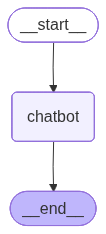

In [12]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [13]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

In [14]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: Hello! How can I help you today?
Assistant: The current President of India is **Droupadi Murmu**.

She assumed office on July 25, 2022.
Assistant: It's important to clarify that India and the United States have not had a direct military conflict or a "win/loss" situation in most other domains. They are strategic partners with strong diplomatic and economic ties.

However, if you are referring to a **sports match**, specifically **cricket**, then it's highly likely India would win against the United States.

Here's why, in the context of cricket:

1.  **Dominance in Cricket:** India is one of the top-ranked and most dominant teams in international cricket. Cricket is a national obsession in India, with a massive talent pool, professional leagues (like the IPL), and a long history of success.
2.  **USA's Developing Cricket:** The United States cricket team is relatively new to the international stage and is still developing. While they are improving and have some talented play

In [1]:
import hashlib

def generate_document_id(doc: str, index: int = 1) -> str:
    """
    Generate deterministic numeric ID with suffix n1, n2, etc.
    
    Args:
        doc (str): The document content
        index (int): Index for uniqueness (default 1)
    
    Returns:
        str: Generated ID, e.g., 748837283n1
    """
    # Step 1: Convert string to bytes
    doc_bytes = doc.encode("utf-8")
    
    # Step 2: Hash the string using MD5 or SHA256
    hash_object = hashlib.md5(doc_bytes)
    
    # Step 3: Convert hash to integer and take first few digits
    hash_int = int(hash_object.hexdigest(), 16)
    hash_str = str(hash_int)[:9]  # take first 9 digits for readability
    
    # Step 4: Append index suffix
    generated_id = f"{hash_str}n{index}"
    
    return generated_id

# Example
doc = "Hello how are you"
print(generate_document_id(doc, 1))  # e.g., 748837283n1
print(generate_document_id(doc, 2))  # e.g., 748837283n2

107886080n1
107886080n2


In [1]:
from sentence_transformers import CrossEncoder

# Example texts
text1 = "I love playing football."
text2 = "Soccer is my favorite sport."

# Load a pre-trained cross-encoder model for semantic similarity
# You can choose any suitable model from: https://huggingface.co/sentence-transformers
model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

# Input as a list of text pairs
pairs = [[text1, text2]]

# Predict similarity scores
scores = model.predict(pairs)

print(f"Similarity score between text1 and text2: {scores[0]:.4f}")

/Users/poppinadityagmail.com/Developer/GitHub_Codes/mr-helpmate-ai/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Similarity score between text1 and text2: -2.4171


In [2]:
from sentence_transformers import CrossEncoder

# Example texts
text1 = "I love playing football."
text2 = "Soccer is my favorite sport."

# Load a pre-trained cross-encoder model for semantic similarity
# You can choose any suitable model from: https://huggingface.co/sentence-transformers
model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

# Input as a list of text pairs
pairs = [[text1, text2]]

# Predict similarity scores
scores = model.predict(pairs)

print(f"Similarity score between text1 and text2: {scores[0]:.4f}")

Similarity score between text1 and text2: -2.4171


In [3]:
from sentence_transformers import CrossEncoder

# Example texts
text1 = "I love playing football."
text2 = "Soccer is my favorite sport."

# Load a pre-trained cross-encoder model for semantic similarity
# You can choose any suitable model from: https://huggingface.co/sentence-transformers
model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

# Input as a list of text pairs
pairs = [[text1, text2]]

# Predict similarity scores
scores = model.predict(pairs)

print(f"Similarity score between text1 and text2: {scores[0]:.4f}")

Similarity score between text1 and text2: -2.4171


In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import time

# Generate random embeddings for testing
embedding_size = 768  # typical embedding size
embedding1 = np.random.rand(embedding_size).astype(np.float32)
embedding2 = np.random.rand(embedding_size).astype(np.float32)

# Optionally, create multiple embeddings to test batch performance
num_embeddings = 1000
embedding_batch = np.random.rand(num_embeddings, embedding_size).astype(np.float32)

# --- Single comparison ---
start = time.time()
sim = cosine_similarity([embedding1], [embedding2])[0][0]
end = time.time()
print(f"Cosine similarity (single pair): {sim:.4f}")
print(f"Time taken (single pair): {end - start:.6f} sec")

# --- Batch comparison (embedding1 vs batch) ---
start = time.time()
sims = cosine_similarity([embedding1], embedding_batch)[0]
end = time.time()
print(f"Cosine similarities (embedding1 vs batch) first 5: {sims[:5]}")
print(f"Time taken (batch of {num_embeddings}): {end - start:.6f} sec")

Cosine similarity (single pair): 0.7607
Time taken (single pair): 0.010707 sec
Cosine similarities (embedding1 vs batch) first 5: [0.7490525 0.7558036 0.7598893 0.7621662 0.7595457]
Time taken (batch of 1000): 0.001645 sec


In [6]:
from sentence_transformers import CrossEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import time

# -------------------------------
# 🔹 Test 1: Cross-Encoder (Text)
# -------------------------------
text1 = "I love playing football."
text2 = "Soccer is my favorite sport."

print("\n=== Cross-Encoder Similarity Test ===")

start = time.time()
# Load pre-trained cross-encoder model for semantic similarity
model = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

# Input as text pairs
pairs = [[text1, text2]]

# Predict similarity scores
scores = model.predict(pairs)
end = time.time()

print(f"Similarity score between text1 and text2: {scores[0]:.4f}")
print(f"Time taken (Cross-Encoder): {end - start:.6f} sec")


# ----------------------------------
# 🔹 Test 2: Embedding Similarity
# ----------------------------------
print("\n=== Embedding Cosine Similarity Test ===")

embedding_size = 768  # typical embedding size
embedding1 = np.random.rand(embedding_size).astype(np.float32)
embedding2 = np.random.rand(embedding_size).astype(np.float32)

# Optionally, create multiple embeddings to test batch performance
num_embeddings = 1000
embedding_batch = np.random.rand(num_embeddings, embedding_size).astype(np.float32)

# --- Single comparison ---
start = time.time()
sim = cosine_similarity([embedding1], [embedding2])[0][0]
end = time.time()
print(f"Cosine similarity (single pair): {sim:.4f}")
print(f"Time taken (single pair): {end - start:.6f} sec")

# --- Batch comparison (embedding1 vs batch) ---
start = time.time()
sims = cosine_similarity([embedding1], embedding_batch)[0]
end = time.time()
print(f"Cosine similarities (embedding1 vs batch) first 5: {sims[:5]}")
print(f"Time taken (batch of {num_embeddings}): {end - start:.6f} sec")

# ----------------------------------
# Summary
# ----------------------------------
print("\n=== Summary ===")
print("Cross-Encoder -> More accurate but slower (good for re-ranking small sets)")
print("Cosine Similarity -> Fast and scalable (ideal for large vector search)")


=== Cross-Encoder Similarity Test ===
Similarity score between text1 and text2: -2.4171
Time taken (Cross-Encoder): 4.874623 sec

=== Embedding Cosine Similarity Test ===
Cosine similarity (single pair): 0.7442
Time taken (single pair): 0.001431 sec
Cosine similarities (embedding1 vs batch) first 5: [0.75799984 0.74224573 0.75904715 0.7564192  0.7476599 ]
Time taken (batch of 1000): 0.001594 sec

=== Summary ===
Cross-Encoder -> More accurate but slower (good for re-ranking small sets)
Cosine Similarity -> Fast and scalable (ideal for large vector search)
